# Recovering gold from ore

Prepare a prototype machine learning model for Numbers. The company develops solutions for efficient operation of industrial enterprises.
The model must predict the recovery rate of gold from gold-bearing ore. We need to use data with mining and refining parameters. 
The model will help to optimize production, so as not to run a plant with unprofitable characteristics.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a>

## Data preprocessing

Import pandas, numpy, and sklearn libraries for further work:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from numpy.random import RandomState
from sklearn.model_selection import (cross_validate, cross_val_score, cross_val_predict)
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt

Let's write the data into the dataframes:

In [2]:
try:
    data_train = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_train_new.csv')
    data_test = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_test_new.csv')
    data_full = pd.read_csv(r'C:\Users\Julia\Desktop\DATA_SCIENCE\Datasets\gold_recovery_full_new.csv')
except:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Unload the information and the first 5 lines of dataframes `data_train`, `data_test` and `data_full`, also check the data for duplicates and missing values:

In [3]:
def summary (data):
    print('Duplicates:', data.duplicated().sum())
    print('Missing values:', data.isna().sum())
    data.info()
    data.head()
    return data

In [4]:
summary(data_train)

Duplicates: 0
Missing values: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag           

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
summary(data_test)

Duplicates: 0
Missing values: date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate      

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [6]:
summary(data_full)

Duplicates: 0
Missing values: date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag           

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


There are no duplicates in all dataframes, the data types match the description. Data gaps require further investigation.

**Check if the enrichment efficiency is calculated correctly. Let us calculate it on the training sample for the feature `rougher.output.recovery`. Let us find the MAE between our calculations and the value of the trait.**

In [7]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_train['rougher_calculation_recovery'] = (C * (F - T)) / (F * (C - T)) * 100
print('Real index', data_train['rougher.output.recovery'].head())
print()
print('Calculation index', data_train['rougher_calculation_recovery'].head())
print()
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'], data_train['rougher_calculation_recovery']))

Real index 0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Calculation index 0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher_calculation_recovery, dtype: float64

MAE: 9.73512347450521e-15


We checked the calculation of enrichment efficiency, the formulas are correct, the average absolute error is 9.7

**Let's analyze the features that are not available in the test sample.**

In [8]:
data_train.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

In the test sample, the output parameters `output` and calculation parameters `calculation` are not available at all stages - at the flotation stage.

**Let's proceed to data preprocessing.** Observations of data changes are laid out in chronological order with 1 hour difference, the remaining missing values we can fill through pandas.bfill() (direct fill) and pandas.ffill() (reverse fill) methods. They will propagate the last valid observation forward and backward. Let's perform this operation on all datasets

In [9]:
data_train = data_train.ffill().bfill()
data_test = data_test.ffill().bfill()
data_full = data_full.ffill().bfill()

Now let's select the features suitable for training the model using the correlation matrix (select the most correlated with the target features `final.output.recovery`, `rougher.output.recovery`). We will remove the features that are strongly correlated with those already selected; such features will not affect the quality of the model, but will increase its complexity.

In [10]:
model_columns = list(data_test.columns)
input_columns = ['final.output.recovery', 'rougher.output.recovery'] + model_columns

In [11]:
(data_train[input_columns].corr().sort_values(by = 'final.output.recovery', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,final.output.recovery,rougher.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.recovery,1.000000,0.328307,0.384798,0.155639,0.067157,0.214886,0.133526,0.028631,0.148987,0.042755,0.143670,0.028894,0.058578,-0.017229,0.310574,0.205706,0.169602,0.048866,0.261590,0.308561,-0.013655,0.328838,0.019862,0.305498,0.228755,0.093931,-0.148411,-0.084320,-0.183531,-0.093720,-0.179362,-0.094237,-0.130293,-0.094668,-0.092098,-0.092495,0.147045,0.003783,0.122951,0.000455,0.187641,0.031709,0.038290,0.011031,0.209659,0.057357,0.170796,-0.089021,0.098198,0.024159,0.068281,0.043815,-0.027253,-0.035782
primary_cleaner.input.sulfate,0.384798,0.272823,1.000000,0.484178,0.166952,0.261111,0.028847,-0.013909,0.049839,-0.027622,0.049544,-0.001592,0.107193,-0.019518,0.541870,0.558860,0.318932,-0.075122,0.364885,0.606508,0.376819,0.392475,0.488006,0.427297,0.204769,0.073873,-0.227703,-0.219554,-0.253974,-0.221854,-0.291650,-0.221254,-0.262478,-0.225754,-0.238906,-0.226807,0.129323,0.103041,0.138515,0.122921,0.082193,-0.012181,0.003893,-0.040872,0.087795,0.032176,0.110808,-0.064222,-0.006189,-0.030974,0.000540,-0.024671,-0.104186,-0.142148
rougher.input.floatbank10_xanthate,0.328838,0.238468,0.392475,0.370096,0.021669,0.387407,-0.012183,0.235617,0.019102,0.226113,0.021813,0.244902,-0.142091,0.160170,0.147382,0.018927,0.600050,0.076500,0.321101,0.084383,-0.066885,1.000000,0.006038,0.891798,0.118606,-0.068682,-0.101136,-0.354941,-0.165983,-0.361398,-0.120352,-0.357478,0.028249,-0.356682,0.011242,-0.356218,0.131249,0.118027,0.154761,0.108394,-0.030885,-0.136817,-0.080310,0.052191,0.082465,-0.215068,0.001147,-0.364921,-0.129094,-0.150035,-0.148711,-0.159383,-0.294344,0.010429
rougher.output.recovery,0.328307,1.000000,0.272823,0.041395,-0.012795,0.106701,0.087111,0.043377,0.100831,0.039777,0.114148,0.043249,0.005463,0.005309,0.176421,0.173314,0.086685,0.051702,0.184105,0.156173,-0.099457,0.238468,-0.071547,0.216100,0.173309,0.136466,-0.072852,-0.078499,-0.100282,-0.079087,-0.088645,-0.080815,-0.067713,-0.077880,-0.031946,-0.077584,0.157805,-0.020689,0.139664,-0.025590,0.190365,0.006491,0.054296,-0.034223,0.250773,0.051893,0.240501,-0.061388,0.

In [12]:
print(data_train.shape)
print(data_test.shape)

(14149, 88)
(5290, 53)


In [13]:
dropped_columns = ['primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_b_air',
        'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_c_level',
        'primary_cleaner.state.floatbank8_d_level', 'rougher.input.floatbank10_sulfate',
        'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_c_level',
        'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
        'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank2_a_air',
        'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank4_b_air',
        'secondary_cleaner.state.floatbank5_b_air', 'secondary_cleaner.state.floatbank5_b_level',
        'rougher.state.floatbank10_b_level']
model_columns = [column for column in model_columns if column not in dropped_columns]
input_columns = [column for column in input_columns if column not in dropped_columns]

The features selected for deletion refer to the parameters that characterize the current state of the process steps. They may be directly related to the remaining features (the dependence of each other's fluid levels and air volumes in different floatbanks is high). It is possible that this is how the process is set up, and unnecessary features can be removed. But perhaps not. If the dependencies between the features change in the future (liquid levels and gas volumes in different floatbanks become independent), the model may become irrelevant. It is worth keeping an eye on these parameters, and if necessary, update the model. Let's delete the selected features:

In [14]:
data_train = data_train.drop(dropped_columns, axis = 1)
data_test = data_test.drop(dropped_columns, axis = 1)

In [15]:
print(data_train.shape)
print(data_test.shape)

(14149, 69)
(5290, 34)


Let's supplement the test sample with data from the original sample:

In [16]:
from_full_to_test = ['date', 'rougher.output.recovery',
                     'final.output.recovery',
                     'rougher.output.concentrate_au',
                     'rougher.output.concentrate_ag',
                     'rougher.output.concentrate_pb',
                     'rougher.output.concentrate_sol',
                     'final.output.concentrate_au',
                     'final.output.concentrate_ag',
                     'final.output.concentrate_pb',
                     'final.output.concentrate_sol']
data_test = data_test.merge(data_full[from_full_to_test], on='date', how='left')

Let's remove the `date` column, we don't need it to build the model

In [17]:
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)
data_full = data_full.drop('date', axis=1)

**Conclusion:**
- we imported pandas, numpy and sklearn libraries for further work, examined the data
- we did not find duplicates in the data, we filled in the missing values using bfill and ffill methods
- checked the calculation of enrichment efficiency, the formulas are correct, the mean absolute error is 9.7
- analyzed the features unavailable in the test sample and found that in the test sample, the output parameters are unavailable at all stages and the calculation parameters are unavailable at the flotation stage
- we selected the features suitable for model training using the correlation matrix. We removed the features that are highly correlated with those already selected. These features are redundant for the model (some parameters that characterize the current state of the technological process stages). They will not participate in the model building. If the technological process changes, the behavior of these features may change, so you should monitor these parameters and, if necessary, update the model
- we got rid of the date column, it will not be useful in building the model

## Data analysis

**Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of cleaning**

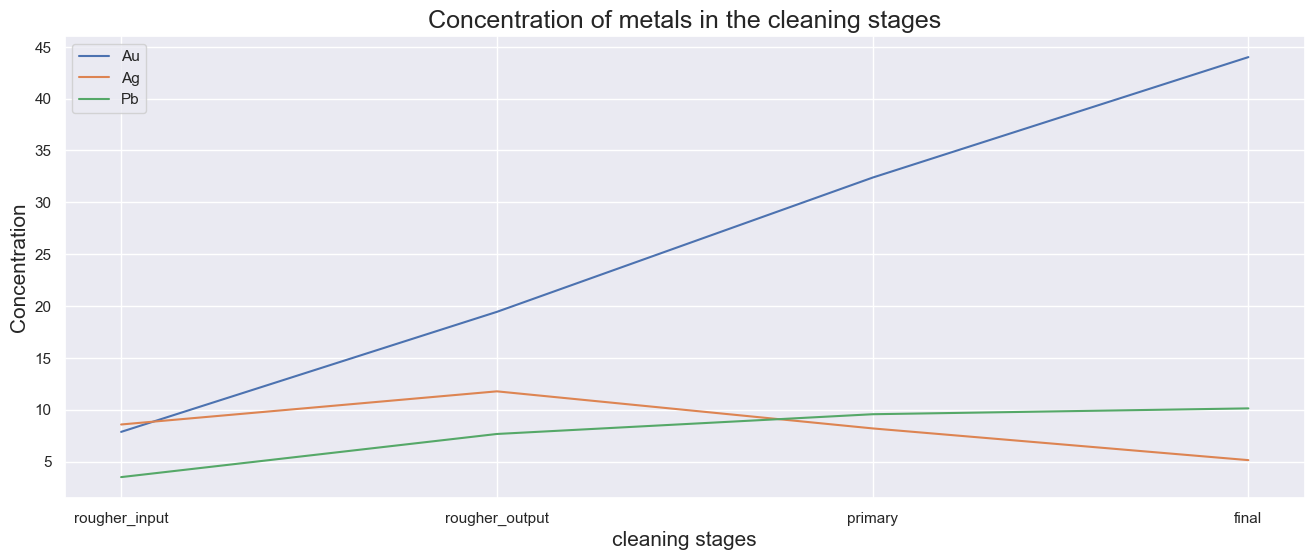

In [18]:
data_train = data_train.set_index(pd.DatetimeIndex(data_train.index))
data_test = data_test.set_index(pd.DatetimeIndex(data_test.index))
data_full = data_full.set_index(pd.DatetimeIndex(data_full.index))
metal_concs = np.array([['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
                      ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
                      ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'],])
graf_names = ['rougher_input', 'rougher_output', 'primary', 'final']
metals = ['Au', 'Ag', 'Pb']
sns.set()
f, axes = plt.subplots(1, 1, figsize=(16, 6))
axes.set_title('Concentration of metals in the cleaning stages', fontsize=18)
axes.set_ylabel('Concentration', fontsize=15)
axes.set_xlabel('cleaning stages', fontsize=15)
for cols, metal in zip(metal_concs, metals):
    sns.lineplot(data = pd.Series(data_train[cols].mean().values, index=graf_names),
                legend = 'full',
                label = metal)
plt.gca();

From the graph we can conclude that with each stage of purification the concentration of gold in the mixture increases rapidly, the concentration of silver decreases, and the concentration of plumbum slightly increases. It should be noted that the concentration of silver before purification (feedstock) is higher and falls during purification.

**Let's compare the distribution of raw material pellet sizes on the training and test samples**

In [19]:
data_train.filter(like='feed_size').describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,14149.000000,14149.000000
mean,7.322310,60.239856
std,0.614062,23.005310
min,1.080000,9.659576
25%,6.960000,48.966751
50%,7.290000,55.269784
75%,7.700000,66.007526
max,10.470000,484.967466


In [20]:
data_test.filter(like='feed_size').describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,5290.000000,5290.000000
mean,7.266339,55.952754
std,0.610219,19.080334
min,5.650000,0.046369
25%,6.890000,43.906504
50%,7.250000,50.846843
75%,7.600000,62.451165
max,15.500000,392.494040


Let's plot the distribution graphs of raw material pellet size and calculate the 95% confidence interval

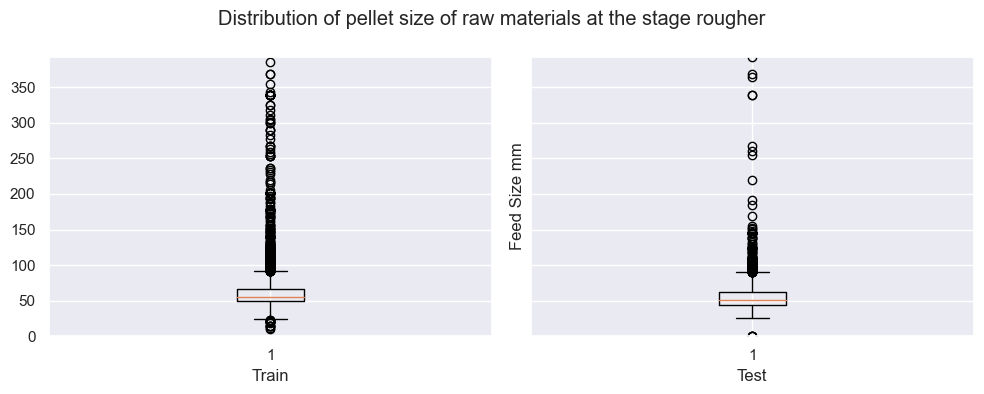

Average pellet size:
Train: 60.23985599255736 | Test: 55.95275402889511
95% confidence interval:
Train: 40.07817371154805 , 97.49382725093666 | Test: 39.720037912895954 , 94.18724815142866


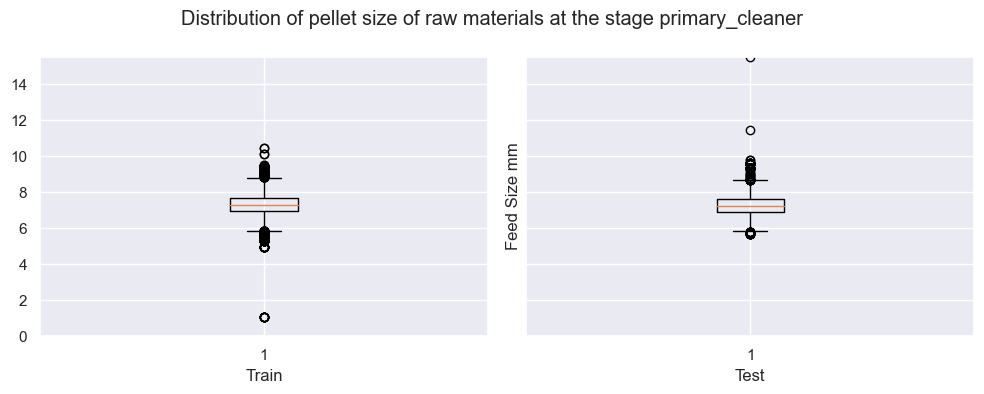

Average pellet size:
Train: 7.322309906901298 | Test: 7.266339191270909
95% confidence interval:
Train: 6.149999909502604 , 8.520000457763674 | Test: 6.0 , 8.510000228881836


In [21]:
for phase in ['rougher', 'primary_cleaner']:
    fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, tight_layout=True)
    fig.suptitle(f'Distribution of pellet size of raw materials at the stage {phase}')
    column = phase + '.input.feed_size'
    ax[0].boxplot(data_train[column])
    ax[1].boxplot(data_test[column])
    plt.ylim(0, data_test[column].max())
    ax[0].set(xlabel='Train')
    ax[1].set(xlabel='Test')
    plt.ylabel('Feed Size mm')
    plt.show()
    print ('Average pellet size:')
    print ('Train:', data_train[column].mean(), end=' | ')
    print ('Test:', data_test[column].mean())
    print ('95% confidence interval:')
    print ('Train:', np.quantile(data_train[column], 0.025), ',', np.quantile(data_train[column], 0.975), end=' | ')
    print ('Test:' , np.quantile(data_test[column], 0.025), ',', np.quantile(data_test[column], 0.975))

C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

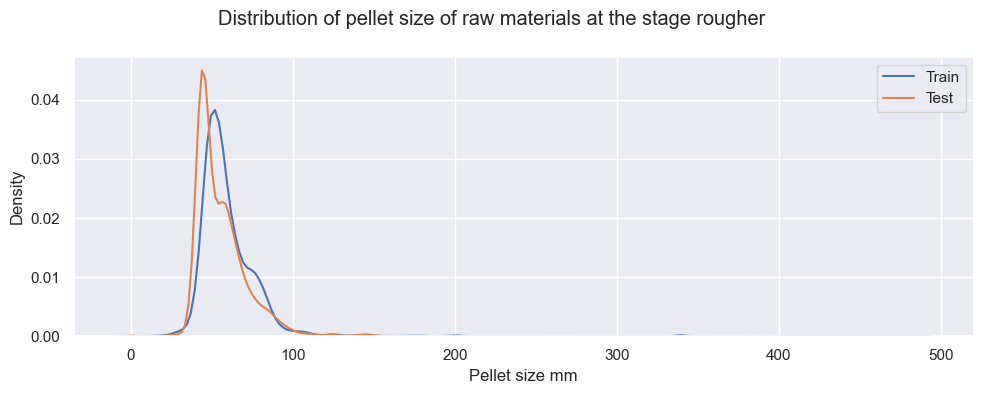

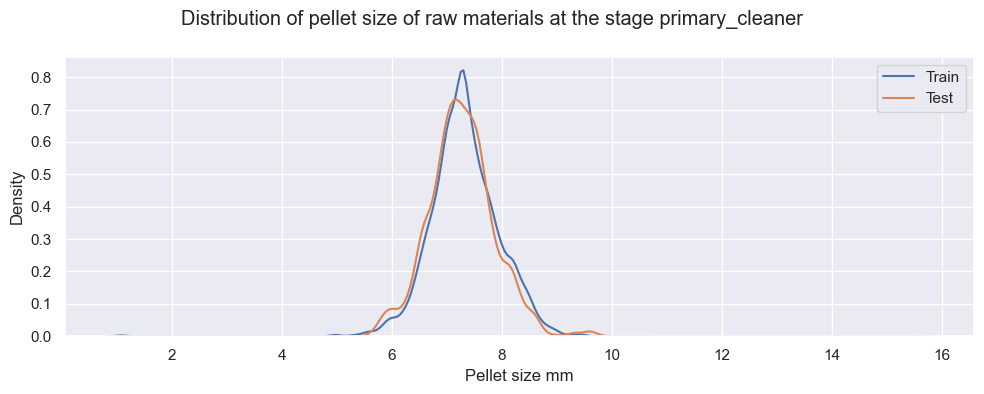

In [22]:
for phase in ['rougher', 'primary_cleaner']:
    fig = plt.figure(figsize=(10, 4), tight_layout=True)
    fig.suptitle(f'Distribution of pellet size of raw materials at the stage {phase}')
    column = phase + '.input.feed_size'
    sns.distplot(data_train[column], kde=True, hist=False)
    sns.distplot(data_test[column], kde=True, hist=False)
    plt.legend(['Train', 'Test'])
    plt.xlabel('Pellet size mm')
    plt.ylabel('Density')

The graphs show that the distribution of raw material pellet size at the stages in the training and test samples does not differ in terms of statistical significance. This leads to the conclusion that the estimation of the model will be correct.

**We investigate the total concentration of all substances at different stages: in the raw material, in the draft and final concentrates.**

Let's write the functions for calculating the total concentration in the raw material, draft and final concentrates

In [23]:
def feed_concentr(data):  
    return (data['rougher.input.feed_au'] + data['rougher.input.feed_ag'] + 
            data['rougher.input.feed_pb'] + data['rougher.input.feed_sol'])
def rougher_concentr(data):
    return (data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag'] + 
            data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol'])
def final_concentr(data):  
    return (data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + 
            data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'])

Let's add to the training and initial samples data on total concentrations at the 3 stages

In [24]:
data_train['rougher.input.feed_sum'] = feed_concentr(data_train)
data_train['rougher.output.concentrate_sum'] = rougher_concentr(data_train)
data_train['final.output.concentrate_sum'] = final_concentr(data_train)

data_full['rougher.input.feed_sum'] = feed_concentr(data_full)
data_full['rougher.output.concentrate_sum'] = rougher_concentr(data_full)
data_full['final.output.concentrate_sum'] = final_concentr(data_full)

data_test['rougher.input.feed_sum'] = feed_concentr(data_test)
data_test['rougher.output.concentrate_sum'] = rougher_concentr(data_test)
data_test['final.output.concentrate_sum'] = final_concentr(data_test)

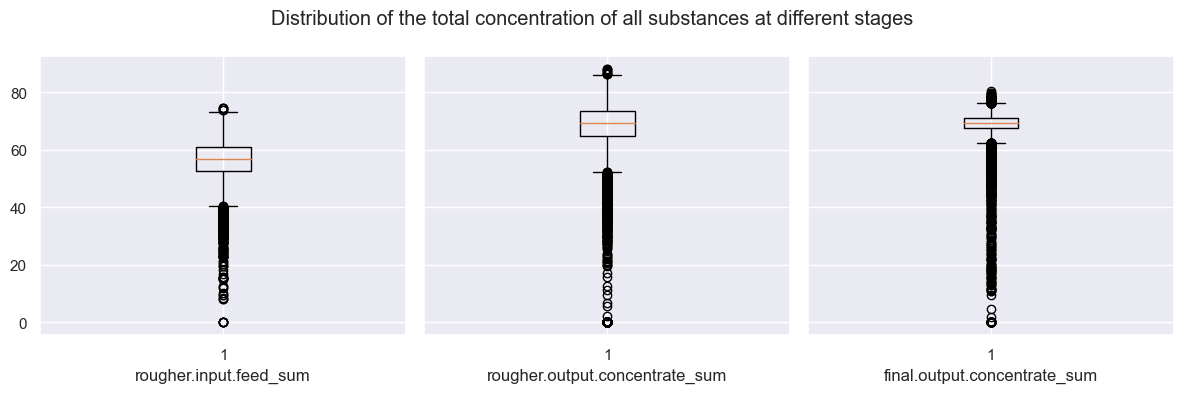

In [25]:
phases_sum_list = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'final.output.concentrate_sum']
fig, ax = plt.subplots(1, 3, figsize=(12,4), sharey=True, tight_layout=True)
fig.suptitle('Distribution of the total concentration of all substances at different stages')
i = 0
for phase in phases_sum_list:
    ax[i].boxplot(data_train[phase])
    ax[i].set(xlabel=phase)
    i += 1

C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

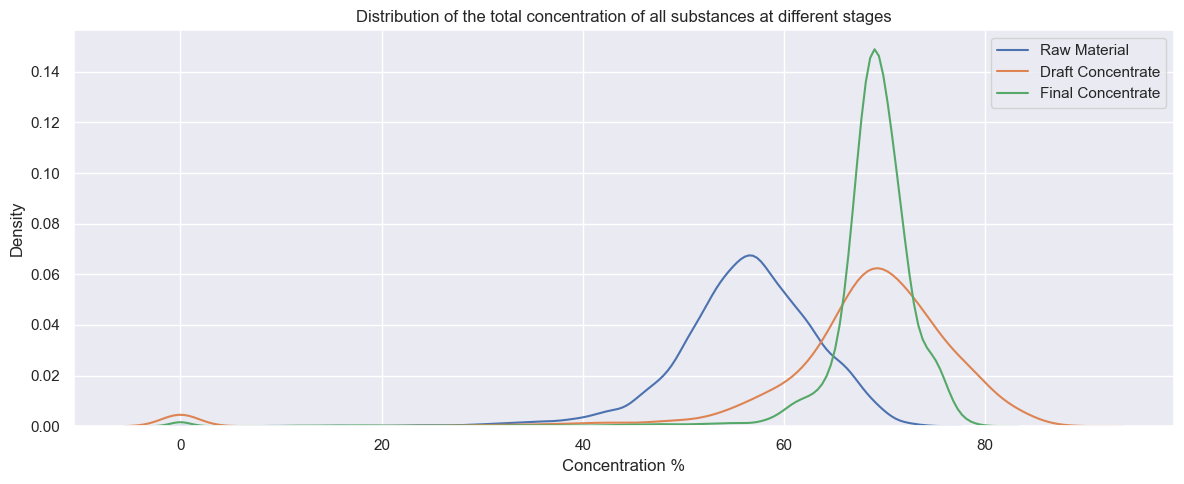

In [26]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
for phase in phases_sum_list:
    sns.distplot(data_train[phase], kde=True, hist=False)
plt.legend(['Raw Material', 'Draft Concentrate', 'Final Concentrate'])
plt.title('Distribution of the total concentration of all substances at different stages')
plt.xlabel('Concentration %')
plt.ylabel('Density')
plt.show()


At all stages there are anomalous zero values of total concentration, remove all objects that have at least one value of total concentration less than 30, for correct work of the model.

In [27]:
before_full = len(data_full)
data_full = data_full[(data_full['rougher.input.feed_sum'] > 30) &
                  (data_full['rougher.output.concentrate_sum'] > 30) &
                  (data_full['final.output.concentrate_sum'] > 30)]

before_train = len(data_train)
data_train = data_train[(data_train['rougher.input.feed_sum'] > 30) &
                  (data_train['rougher.output.concentrate_sum'] > 30) &
                  (data_train['final.output.concentrate_sum'] > 30)]

before_test = len(data_test)
data_test = data_test[(data_test['rougher.input.feed_sum'] > 30) &
                  (data_test['rougher.output.concentrate_sum'] > 30) &
                  (data_test['final.output.concentrate_sum'] > 30)]

In [28]:
print('Removed objects from the original sample:', (before_full - len(data_full)))
print('Removed objects from the train sample:', (before_train - len(data_train)))
print('Removed objects from the test sample:', (before_test - len(data_test)))

Removed objects from the original sample: 671
Removed objects from the train sample: 495
Removed objects from the test sample: 176


In [29]:
sum_columns = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum','final.output.concentrate_sum']
data_full = data_full.drop(sum_columns,axis=1)
data_train = data_train.drop(sum_columns,axis=1)
data_test = data_test.drop(sum_columns,axis=1)
data_full.reset_index(drop= True , inplace= True )
data_train.reset_index(drop= True , inplace= True )
data_test.reset_index(drop= True , inplace= True )

**Conclusion:**
- We have checked how the concentration of metals (Au, Ag, Pb) changes at various stages of purification, for this purpose we have plotted and found out that with every stage of purification the concentration of gold in the mixture rises rapidly, the concentration of silver decreases, and the concentration of plumbum slightly increases
- we compared the distribution of granule size of raw materials on the training and test samples, using graphs of distribution of granule size of raw materials, we calculated the 95% confidence interval and found out that the distribution of granule size of raw materials on the stages in the training and test samples does not differ in terms of statistical significance. From this we conclude that the model estimation will be correct
- we investigated the total concentration of all substances in different stages: in raw materials, in draft and final concentrates, found out that at all stages there are anomalous zero values of total concentration, removed all objects with at least one value of total concentration less than 30, which will make the model work correctly

## Model

**Write a function to calculate the final sMAPE.**

In [30]:
def smape(target_true, target_pred):       
    error = abs(target_true - target_pred)
    scale = (abs(target_true) + abs(target_pred)) / 2
    return (error / scale).mean() * 100

In [31]:
def final_smape(target_true, target_pred):
    target_true.reset_index(drop=True, inplace=True)
    target_pred = pd.DataFrame(data=target_pred)
    smape_rougher = smape(target_true.iloc[:, 0], target_pred.iloc[:, 0])
    smape_final = smape(target_true.iloc[:, 1], target_pred.iloc[:, 1])
    return 0.25 * smape_rougher + 0.75 * smape_final 

Let's create a scorer based on the function for calculating the total sMAPE and write a function for calculating the total sMAPE on crossvalidation

In [32]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)
def cross_validation_smape(model, features, target):
    return np.abs(np.average(cross_validate(model, features, target, scoring=smape_scorer, n_jobs=-1)['test_score']))

**Let's train different models and evaluate their quality by cross-validation. Select the best model and test it on the test sample**.

Select the features and the target feature in the training and test samples

In [33]:
data_train = data_train.loc[:, list(data_test.columns)]
numeric = ['rougher.output.recovery', 'final.output.recovery']
features_train = data_train.drop(numeric, axis=1)
target_train = data_train[numeric]
features_test = data_test.drop(numeric, axis=1)
target_test = data_test[numeric]

Scaling the features on the training and test samples using the `StandardScaler` method

In [34]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)
display('Features Train', features_train.head())
print()
display('Features Test', features_test.tail())
print()
display('Target Train', target_train.sample(5))
print()
display('Target Test', target_test.sample(5))

'Features Train'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-0.179068,0.373081,-0.123839,0.277105,-0.447430,-0.811578,0.050454,-1.337888,-1.132485,0.464135,...,-0.962268,-2.699847,-0.050386,-0.273467,-0.514897,-0.220783,-0.672287,0.666164,-0.224256,-1.306999
1,-0.216547,0.422954,-0.123839,0.314093,-0.242813,-0.321345,0.122311,-1.305303,-1.149914,0.481241,...,-0.988970,-2.534815,0.060175,-0.217810,-0.392870,-0.212064,-0.513828,0.646337,-0.169380,-1.395548
2,-0.262908,0.725845,-0.123839,0.283773,-0.045960,-0.343337,0.211855,-1.329263,-1.248152,0.527687,...,-0.983680,-2.579520,-0.074735,-0.179179,-0.435420,-0.353598,-0.527550,0.666562,0.000204,-1.350846
3,-0.302612,0.727585,-0.123839,0.298333,-0.058268,-0.315748,0.215100,-1.368507,-1.360611,0.650900,...,-0.987714,-2.540510,-0.253735,-0.073134,-0.463718,-0.379631,-0.517500,0.660508,-0.163792,-1.537183
4,-0.412325,0.903218,-0.123839,0.333264,-0.047638,-0.334903,0.222960,-1.359061,-1.592269,0.630713,...,-0.989268,-2.581410,-0.298752,0.166722,-0.419373,-0.448953,-0.491281,0.737140,-0.049266,-1.508518


'Features Test'

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
5109,1.021714,2.105774,1.208565,0.032208,-1.593723,-0.301410,-0.499886,1.633653,1.092771,0.445882,...,-1.863600,0.191671,-1.104730,0.712759,-0.409808,0.091633,0.636283,-0.137474,-0.348402,0.587208
5110,0.994875,2.117416,1.208565,0.031723,-1.243698,0.683659,-0.330822,1.472225,0.892507,0.529346,...,-1.863659,0.187641,-1.009755,0.636507,-0.523389,0.156209,0.716189,-0.170599,-0.336148,0.182741
5111,0.949408,2.114762,1.208565,0.748599,-0.842382,-0.192409,-0.134557,1.444228,0.825064,0.687348,...,-1.864496,0.245257,-0.296395,0.895411,-0.437765,0.715527,0.927600,-0.305508,-0.273186,-0.331806
5112,1.168767,1.950051,1.208565,1.639973,-0.845250,-0.894488,-0.134187,1.446268,0.767975,0.697396,...,-1.859151,0.180812,-0.137167,0.922527,-0.519578,0.936468,1.214051,-0.539692,-0.511991,-0.257009
5113,1.216416,1.818467,1.208565,1.965552,-0.848118,-0.477894,-0.144958,1.239675,0.534503,0.866165,...,-1.863345,0.164168,-0.072074,0.851842,-0.589856,0.911433,1.045020,-0.439138,-0.554036,-0.129526


'Target Train'

,rougher.output.recovery,final.output.recovery
11789,94.156234,74.111496
12663,92.914369,99.555574
10841,92.671570,77.477166
493,74.118917,63.134900
13397,92.962950,81.875614


'Target Test'

,rougher.output.recovery,final.output.recovery
728,87.487448,65.151840
1155,80.675429,68.962087
3205,88.871564,69.684760
3074,85.664415,71.433788
2464,83.058536,69.177696


Let's train and scoring regression models to select hyperparameters and choose the best model

In [35]:
cv = 5
models = [DecisionTreeRegressor(random_state = 12345), 
          RandomForestRegressor(random_state = 12345), 
          LinearRegression()]
results_cross_validation = []
for model in models:
    scorer = make_scorer(smape, greater_is_better=False)
    cross_validation_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_train.iloc[:, 0], 
                                              cv=cv, scoring=scorer).mean()
    cross_validation_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_train.iloc[:, 1], 
                                            cv=cv, scoring=scorer).mean()
    total_score = 0.25 * cross_validation_score_rougher + 0.75 * cross_validation_score_final    
    results_cross_validation.append({'model_name': model.__class__.__name__, 
                              'cross_validation_score_rougher': cross_validation_score_rougher, 
                              'cross_validation_score_final': cross_validation_score_final,
                              'total_score': total_score}) 
              
pd.DataFrame(results_cross_validation)

,model_name,cross_validation_score_rougher,cross_validation_score_final,total_score
0,DecisionTreeRegressor,-10.340855,-16.148491,-14.696582
1,RandomForestRegressor,-6.732937,-9.811546,-9.041894
2,LinearRegression,-5.798671,-10.549234,-9.361593


Decision Tree:

In [36]:
state = RandomState(12345)
print('Decision Tree')
for depth in range(50, 200, 50):
        for leaf in range(2,8):
            model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf, random_state=state)
            model.fit(features_train, target_train)
            print('depth =', depth, 'min_samples_leaf=', leaf, ':', cross_validation_smape(model, features_train, target_train))

Decision Tree
depth = 50 min_samples_leaf= 2 : 13.658559553831552
depth = 50 min_samples_leaf= 3 : 13.144453133342893
depth = 50 min_samples_leaf= 4 : 12.809416654016747
depth = 50 min_samples_leaf= 5 : 12.13245466376552
depth = 50 min_samples_leaf= 6 : 12.096039080827834
depth = 50 min_samples_leaf= 7 : 11.949167304007172
depth = 100 min_samples_leaf= 2 : 14.02723099607336
depth = 100 min_samples_leaf= 3 : 13.411553295119727
depth = 100 min_samples_leaf= 4 : 12.82908530385193
depth = 100 min_samples_leaf= 5 : 12.10279321066651
depth = 100 min_samples_leaf= 6 : 12.12230377074769
depth = 100 min_samples_leaf= 7 : 11.983542266383418
depth = 150 min_samples_leaf= 2 : 13.617693753982559
depth = 150 min_samples_leaf= 3 : 13.89745643871297
depth = 150 min_samples_leaf= 4 : 12.995343630517866
depth = 150 min_samples_leaf= 5 : 12.534782325018309
depth = 150 min_samples_leaf= 6 : 12.348144286599638
depth = 150 min_samples_leaf= 7 : 11.858790607505812


Random Forest:

In [37]:
print('Random Forest')
for estimators in range(10, 51, 10):
    for depth in range(2,8,2):
        model = RandomForestRegressor(n_estimators=estimators, max_depth=depth, random_state=state)
        model.fit(features_train, target_train)
        print('estimators =', estimators, 'depth=', depth, ':', cross_validation_smape(model, features_train, target_train))

Random Forest
estimators = 10 depth= 2 : 8.914513637116638
estimators = 10 depth= 4 : 9.059082551044138
estimators = 10 depth= 6 : 9.520957882657653
estimators = 20 depth= 2 : 8.894777007781027
estimators = 20 depth= 4 : 8.999354618782645
estimators = 20 depth= 6 : 9.341308784431865
estimators = 30 depth= 2 : 8.975962707485852
estimators = 30 depth= 4 : 8.973105329869156
estimators = 30 depth= 6 : 9.119520726204717
estimators = 40 depth= 2 : 8.951502099062228
estimators = 40 depth= 4 : 8.989253462438992
estimators = 40 depth= 6 : 9.235958409826875
estimators = 50 depth= 2 : 8.930397494459154
estimators = 50 depth= 4 : 8.989659358735647
estimators = 50 depth= 6 : 9.273878275399714


Linear Regression:

In [38]:
model = LinearRegression()
model.fit(features_train, target_train)
print('Linear Regression:', cross_validation_smape(model, features_train, target_train))

Linear Regression: 9.36159304344945


The best result was shown by the random forest model with 20 trees and depth 2, let's estimate its quality on the test sample

In [39]:
model = RandomForestRegressor(n_estimators=50, max_depth=2, random_state=state)
model.fit(features_train, target_train)
predict_test = model.predict(features_test)
print('Final sMAPE:', final_smape(target_test, predict_test))

Final sMAPE: 7.333321253737666


Let's check the result with a constant model:

In [41]:
target_test_const = pd.DataFrame(index=range(target_test.shape[0]))
target_test_const[0] = target_train.mean()[0]
target_test_const[1] = target_train.mean()[1]
display(target_test_const.head())
print('sMAPE constant model:', final_smape(target_test, target_test_const))

,0,1
0,84.596029,66.883912
1,84.596029,66.883912
2,84.596029,66.883912
3,84.596029,66.883912
4,84.596029,66.883912


sMAPE constant model: 7.557096025788899


**Conclusion:**
- We wrote a function to calculate the final sMAPE, created a scorer based on the function to calculate the final sMAPE and a function to calculate the final sMAPE on crossvalidation
- trained different models (decision tree, random forest and linear regression), evaluated their quality by cross-validation, scaled features on the training and test samples using StandardScaler()
- trained and scored regression models to select hyperparameters and choose the best model
- the best sMAPE result was shown by random forest model with 20 trees and depth 2 (training sample - 8.89%, test sample - 7.29%)
- sMAPE of the constant model shows almost the same result as the random forest model (7.5%)

**General conclusion:**
- examined the data, no duplicates were found in the data, missing values were filled in using the bfill and ffill methods
- checked the calculation of enrichment efficiency, the formulas are correct, the mean absolute error is 9.7
- we have analyzed the features unavailable in the test sample and found out that in the test sample, the output parameters are unavailable at all stages and the calculation parameters are unavailable at the flotation stage
- we selected the features suitable for model training using the correlation matrix. We deleted the features that strongly correlate with those already selected and got rid of the date column, since it will not be of any use for us when building the model
- we checked how the concentration of metals (Au, Ag, Pb) changes at different purification stages, for this we drew charts and found that with each stage of purification the gold concentration in the mixture rises rapidly, the silver concentration falls and the plumbum concentration rises slightly
- we compared the distribution of granule size of raw materials on the training and test samples, using graphs of distribution of granule size of raw materials, we calculated the 95% confidence interval and found out that the distribution of granule size of raw materials on the stages in the training and test samples does not differ in terms of statistical significance. From this we conclude that the model estimation will be correct
- we investigated the total concentration of all substances in different stages: in the raw material, in the draft and final concentrates, we found out that at all stages there are anomalous zero values of the total concentration, we removed all objects with at least one value of the total concentration less than 30, which will make the model work correctly
- we wrote a function to calculate the final sMAPE, created a scorer based on the function for calculating the final sMAPE and a function for calculating the final sMAPE on cross validation
- trained different models (decision tree, random forest and linear regression), evaluated their quality by crossvalidation, scaled features on the training and test samples using the StandardScaler() method
- trained and scored regression models to select hyperparameters and choose the best model
- the best sMAPE result was shown by random forest model with 50 trees (training sample - 9.3%, test sample - 6.7%), sMAPE of constant model was slightly worse than random forest model (7.5%)